In [6]:
%matplotlib inline
%pylab inline
import pandas as pd
df=pd.read_pickle('data/paths.pkl.xz')

Populating the interactive namespace from numpy and matplotlib


In [36]:

def draw_path(to_draw):
    img=imread("paths0.png")
    imshow(img)
    df_by_obj = df.set_index(['filename', 'obj']).sort_index()
    for t in to_draw.index:
        oo = df_by_obj.loc[t]
        plot(oo.x, oo.y)
  

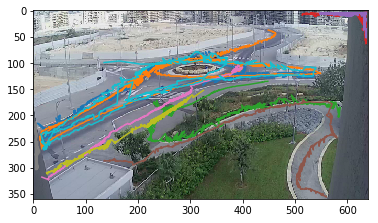

In [39]:

objs = df.groupby(["filename", "obj"]).size().sort_values(ascending=False)
top10 = objs.head(10)
draw_path(top10)

In [41]:
objs = df.groupby(["filename", "obj"]).agg({'time':['min','max']})
begin_time = 
end_time =
date =

time  \
                                                             min   
filename                                 obj                       
-16\20170820143029_100.h264.txt          22  2017-08-20 14:31:09   
.h264.txt                                4   2017-08-20 16:51:53   
                                         13  2017-08-23 10:46:30   
0.h264.txt                               39  2017-08-24 08:52:55   
0003141_100.h264.txt                     6   2017-08-20 00:33:52   
                                         7   2017-08-20 00:33:52   
                                         8   2017-08-20 00:33:52   
                                         9   2017-08-20 00:33:52   
                                         10  2017-08-20 00:33:52   
0041952_100.h264.txt                     7   2017-08-20 04:24:11   
                                         8   2017-08-20 04:24:11   
                                         9   2017-08-20 04:24:11   
                                         10  2017-08-20 04:24:11   
                                         11  2017-08-20 04:24:11   
                                         12  2017-08-20 04:24:11   
                                         13  2017-08-20 04:24:12   
0095531_100.h264.txt                     77  2017-08-20 10:06:12   
                                         78  2017-08-20 10:06:12   
                                         79  2017-08-20 10:06:14   
                                         80  2017-08-20 10:06:31   
                                         81  2017-08-20 10:06:33   
                                         82  2017-08-20 10:06:34   
0114208_100.h264.txt                     20  2017-08-20 11:46:18   
                                         21  2017-08-20 11:46:18   
                                         22  2017-08-20 11:49:31   
                                         23  2017-08-20 11:49:32   
0134406_100.h264.txt                     2   2017-08-20 13:47:01   
                                         3   2017-08-20 13:47:01   
                                         4   2017-08-20 13:47:04   
0153127_100.h264.txt                     17  2017-08-20 15:39:40   
...                                                          ...   
p\cctv\14-16\20170817182813_100.h264.txt 2   2017-08-17 18:32:39   
v10014-16\20170817012709_100.h264.txt    52  2017-08-17 01:37:01   
v10014-16\20170817015738_100.h264.txt    380 2017-08-17 02:05:09   
v10014-16\20170817022803_100.h264.txt    6   2017-08-17 02:30:15   
v10014-16\20170817152551_100.h264.txt    13  2017-08-17 15:30:50   
v10014-16\20170819010919_100.h264.txt    11  2017-08-19 01:09:22   
v10014-16\20170819161019_100.h264.txt    20  2017-08-19 16:14:01   
v10014-16\20170820003141_100.h264.txt    8   2017-08-20 00:33:52   
v10014-16\20170820095531_100.h264.txt    77  2017-08-20 10:06:12   
v10014-16\20170820134406_100.h264.txt    3   2017-08-20 13:47:01   
v10014-16\20170820153127_100.h264.txt    18  2017-08-20 15:39:39   
v10014-16\20170820180348_100.h264.txt    52  2017-08-20 18:14:20   
v10014-16\20170820203719_100.h264.txt    40  2017-08-20 20:46:10   
v10014-16\20170822085521_100.h264.txt    18  2017-08-22 08:57:45   
v10014-16\20170822105708_100.h264.txt    2   2017-08-22 10:58:17   
v10014-16\20170822121142_100.h264.txt    137 2017-08-22 12:23:25   
v10014-16\20170822142906_100.h264.txt    78  2017-08-22 14:38:22   
                                         93  2017-08-22 14:38:22   
v10014-16\20170822190323_100.h264.txt    105 2017-08-22 19:11:01   
v10014-16\20170822211834_100.h264.txt    12  2017-08-22 21:19:46   
v10014-16\20170823044223_100.h264.txt    58  2017-08-23 04:46:56   
v10014-16\20170823062855_100.h264.txt    12  2017-08-23 06:36:20   
v10014-16\20170823083020_100.h264.txt    22  2017-08-23 08:37:32   
v10014-16\20170823101544_100.h264.txt    274 2017-08-23 10:22:41   
v10014-16\20170823114728_100.h264.txt    12  2017-08-23 11:50:05   
v10014-16\20170823133413_100.h264.txt    78  201